2024-02-23 15:58:04.127753: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-23 15:58:04.127784: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-23 15:58:04.128501: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-23 15:58:04.132632: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-23 15:58:04.702436: W tensorflow/compiler/tf2

2024-02-23 15:58:06.663573: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-23 15:58:06.732450: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-02-23 15:58:06.797806: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


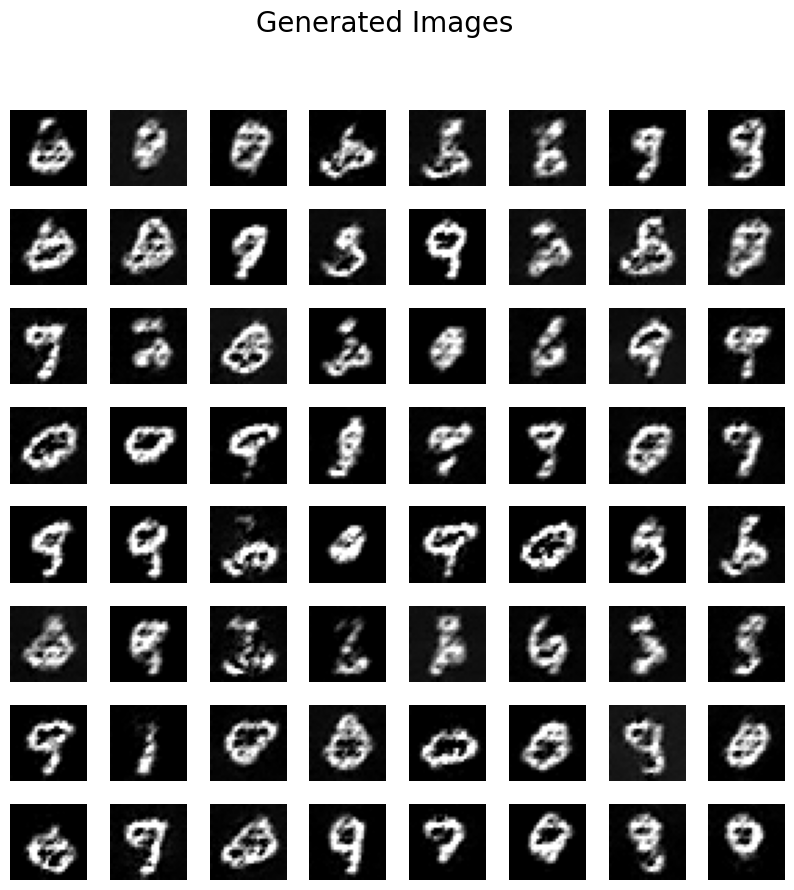

In [1]:
# inference.py
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sys

#GPUを選択
GPU = 1

def generate_images(generator, batch_size):
    """
    生成器から画像を生成して表示する関数
    """
    W = int(np.sqrt(batch_size))
    H = int(np.sqrt(batch_size))

    # ノイズを生成
    noise = tf.random.normal([batch_size, 100])
    # 画像を生成
    generated_images = generator(noise, training=False)
    # 逆正規化
    generated_images = (generated_images * 127.5) + 127.5
    generated_images = np.clip(generated_images, 0, 255).astype(np.uint8)

    # 画像を表示
    fig, axes = plt.subplots(W, H, figsize=(10, 10))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    for i in range(batch_size):
        ax = axes[i // W, i % W]
        ax.imshow(generated_images[i, :, :, 0], cmap='gray')
        ax.axis('off')

    plt.suptitle("Generated Images", fontsize=20)
    plt.show()

if __name__ == "__main__":
    with tf.device('/gpu:{}'.format(GPU)):
        model_path = '/home/rsato/.vscode-server/data/User/globalStorage/gan-test/Generator'

        # モデルのロード
        generator_loaded = tf.keras.models.load_model(model_path)

        # バッチサイズ
        batch_size = 64

        # 画像の生成と表示
        generate_images(generator_loaded, batch_size)

In [1]:
# inference.py
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sys

#GPUを選択
GPU = 1

def generate_images(generator, batch_size):
    """
    生成器から画像を生成して表示する関数
    """
    W = int(np.sqrt(batch_size))
    H = int(np.sqrt(batch_size))

    # ノイズを生成
    noise = tf.random.normal([batch_size, 100])
    # 画像を生成
    generated_images = generator(noise, training=False)
    # 逆正規化
    generated_images = (generated_images * 127.5) + 127.5
    generated_images = np.clip(generated_images, 0, 255).astype(np.uint8)

    # 画像を表示
    fig, axes = plt.subplots(W, H, figsize=(10, 10))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    for i in range(batch_size):
        ax = axes[i // W, i % W]
        ax.imshow(generated_images[i, :, :, 0], cmap='gray')
        ax.axis('off')

    plt.suptitle("Generated Images", fontsize=20)
    plt.show()

if __name__ == "__main__":
    with tf.device('/gpu:{}'.format(GPU)):
        model_path = '/home/rsato/.vscode-server/data/User/globalStorage/gan-test/Generator'

        # モデルのロード
        generator_loaded = tf.keras.models.load_model(model_path)

        # バッチサイズ
        batch_size = 64

        # 画像の生成と表示
        generate_images(generator_loaded, batch_size)

2024-02-23 16:37:44.323180: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-23 16:37:44.323211: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-23 16:37:44.323985: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-23 16:37:44.328837: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-23 16:37:44.915616: W tensorflow/compiler/tf2

RuntimeError: Bad StatusOr access: INTERNAL: failed initializing StreamExecutor for CUDA device ordinal 0: INTERNAL: failed call to cuDevicePrimaryCtxRetain: CUDA_ERROR_OUT_OF_MEMORY: out of memory; total memory reported: 51010207744